Dataset berhasil dimuat.


#####################################################
## 1. Eksplorasi Awal: Head, Info, dan Describe
#####################################################

--- 5 Baris Pertama (df.head()) ---
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               N

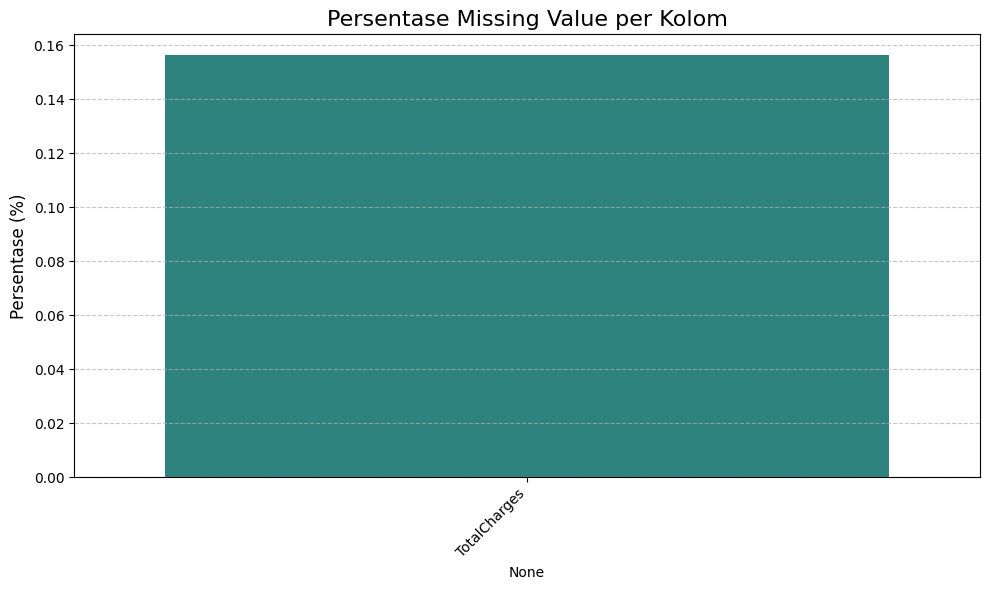


Kesimpulan Missing Value: Ditemukan 1 kolom dengan missing value.
Kolom 'TotalCharges' memiliki missing value setelah konversi tipe data. Ini harus ditangani pada tahap Preprocessing.


#####################################################
## 3. Visualisasi Distribusi Target (Churn)
#####################################################

--- Jumlah dan Persentase Kelas Churn ---
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Persentase 'No' (Tidak Churn): 73.46%
Persentase 'Yes' (Churn): 26.54%


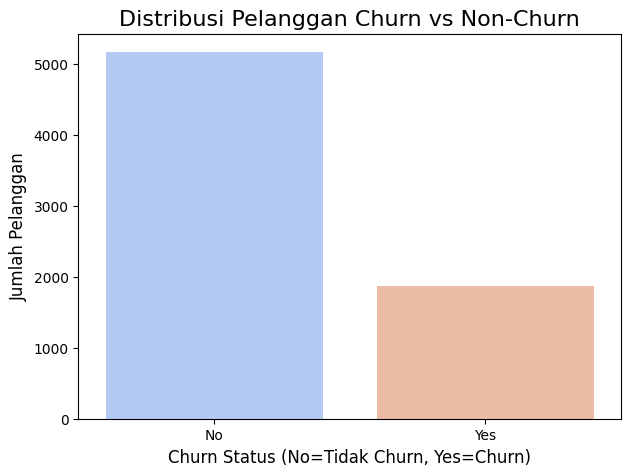


Kesimpulan Distribusi Target: Terjadi Class Imbalance (Ketidakseimbangan Kelas), di mana kelas 'No' (Tidak Churn) mendominasi. Ini harus dipertimbangkan saat Preprocessing dan Evaluasi Model.


#####################################################
## 4. Analisis Korelasi (Heatmap untuk Fitur Numerik)
#####################################################


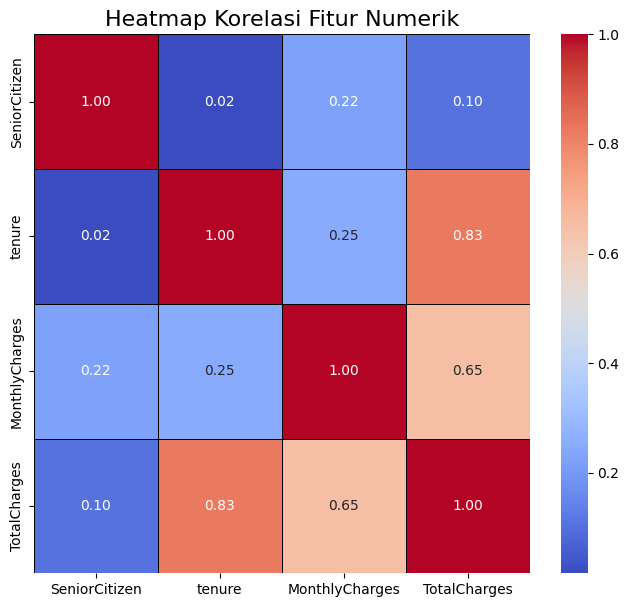

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 0. Konfigurasi Path dan Pemuatan Data ---

# Path file dataset yang Anda tentukan
file_path = r"D:\UDINUS\SMT7\BengKod\capstone-project\data\WA_Fn-UseC_-Telco-Customer-Churn.csv" 

try:
    # Memuat dataset
    df = pd.read_csv(file_path)
    print("Dataset berhasil dimuat.")
except FileNotFoundError:
    print(f"ERROR: File tidak ditemukan di path: {file_path}")
    print("Pastikan nama file dan path yang Anda berikan sudah benar.")
    exit() # Hentikan eksekusi jika file tidak ditemukan
except Exception as e:
    print(f"Terjadi kesalahan saat memuat data: {e}")
    exit()


# --- 1. Eksplorasi Awal ---

print("\n\n#####################################################")
print("## 1. Eksplorasi Awal: Head, Info, dan Describe")
print("#####################################################")

# Tugas 1.1: Tampilkan 5 baris pertama
print("\n--- 5 Baris Pertama (df.head()) ---")
print(df.head()) 

# Penanganan Awal: Konversi TotalCharges ke numerik
# errors='coerce' akan mengubah string kosong/non-angka menjadi NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') 

# Tugas 1.2: Tampilkan ringkasan (info())
print("\n--- Ringkasan Data (df.info()) ---")
df.info() 

# Tugas 1.3: Tampilkan statistik deskriptif (describe())
print("\n--- Statistik Deskriptif untuk Fitur Numerik (df.describe()) ---")
print(df.describe()) 


# --- 2. Identifikasi Missing Value ---

print("\n\n#####################################################")
print("## 2. Identifikasi dan Visualisasi Missing Value")
print("#####################################################")

# Tugas 2.1: Hitung jumlah dan persentase missing value
missing_values = df.isnull().sum()
missing_percentage = (missing_values[missing_values > 0] / len(df)) * 100

print("\n--- Persentase Missing Value per Kolom ---")
if not missing_percentage.empty:
    print(missing_percentage.sort_values(ascending=False))
else:
    print("Tidak ditemukan Missing Value (NaN) pada kolom manapun.")

# Tugas 2.2: Visualisasi missing value
if not missing_percentage.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_percentage.index, y=missing_percentage.values, hue=missing_percentage.index, palette="viridis", legend=False)
    plt.title('Persentase Missing Value per Kolom', fontsize=16)
    plt.ylabel('Persentase (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show() # 

    print(f"\nKesimpulan Missing Value: Ditemukan {missing_percentage.count()} kolom dengan missing value.")
    print("Kolom 'TotalCharges' memiliki missing value setelah konversi tipe data. Ini harus ditangani pada tahap Preprocessing.")
else:
    print("Semua kolom bersih dari Missing Value (NaN).")


# --- 3. Visualisasi Distribusi Target ---

print("\n\n#####################################################")
print("## 3. Visualisasi Distribusi Target (Churn)")
print("#####################################################")

# Tugas 3.1: Visualisasikan distribusi variabel target (Churn)
churn_counts = df['Churn'].value_counts()
churn_percentage = (churn_counts / len(df)) * 100

print("\n--- Jumlah dan Persentase Kelas Churn ---")
print(churn_counts)
print(f"\nPersentase 'No' (Tidak Churn): {churn_percentage['No']:.2f}%")
print(f"Persentase 'Yes' (Churn): {churn_percentage['Yes']:.2f}%")

plt.figure(figsize=(7, 5))
sns.countplot(x='Churn', data=df, hue='Churn', palette="coolwarm", legend=False)
plt.title('Distribusi Pelanggan Churn vs Non-Churn', fontsize=16)
plt.xlabel('Churn Status (No=Tidak Churn, Yes=Churn)', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.show() # 

print("\nKesimpulan Distribusi Target: Terjadi Class Imbalance (Ketidakseimbangan Kelas), di mana kelas 'No' (Tidak Churn) mendominasi. Ini harus dipertimbangkan saat Preprocessing dan Evaluasi Model.")


# --- 4. Analisis Korelasi (Fitur Numerik) ---

print("\n\n#####################################################")
print("## 4. Analisis Korelasi (Heatmap untuk Fitur Numerik)")
print("#####################################################")

# Tugas 4.1: Pilih hanya kolom numerik (termasuk yang sudah dikonversi)
# Kolom numerik: 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'
numerical_df = df[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']]

# Menghitung matriks korelasi
correlation_matrix = numerical_df.corr()

# Tugas 4.2: Buat heatmap korelasi
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('Heatmap Korelasi Fitur Numerik', fontsize=16)
plt.show() # 


Jumlah data setelah penghapusan baris NaN:  7032
Ukuran Data Latih: (5625, 30)
Ukuran Data Uji: (1407, 30)


--- Hasil Evaluasi Direct Modeling ---

Melatih Model: Logistic Regression (Direct)...
Accuracy: 0.8038
Precision: 0.6485
Recall: 0.5722
F1-Score: 0.6080
Confusion Matrix:
 [[917 116]
 [160 214]]


c:\Users\riadi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


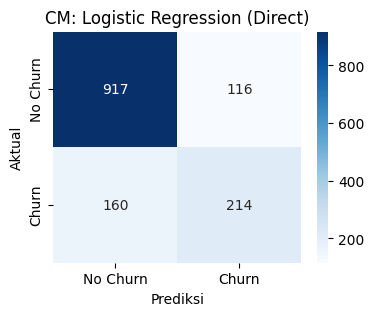


Melatih Model: Random Forest (Direct)...
Accuracy: 0.7896
Precision: 0.6258
Recall: 0.5187
F1-Score: 0.5673
Confusion Matrix:
 [[917 116]
 [180 194]]


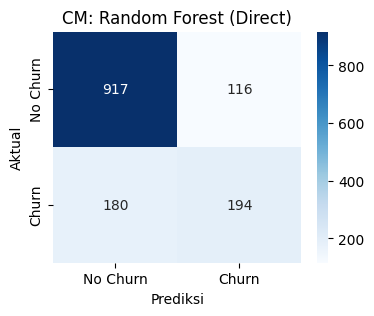


Melatih Model: Voting Classifier (Direct)...


c:\Users\riadi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7903
Precision: 0.6312
Recall: 0.5080
F1-Score: 0.5630
Confusion Matrix:
 [[922 111]
 [184 190]]


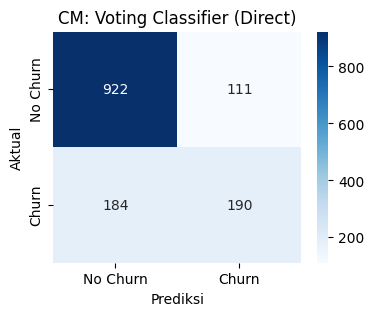


--- Ringkasan Performa Direct Modeling ---
                          Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression (Direct)  0.803838   0.648485  0.572193  0.607955
1        Random Forest (Direct)  0.789623   0.625806  0.518717  0.567251
2    Voting Classifier (Direct)  0.790334   0.631229  0.508021  0.562963


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib

# Membuat salinan data untuk skenario Direct Modeling
df_direct = df.copy()

# --- 1. Persiapan Data Minimal (Direct) ---

# 1.1 Hapus Kolom yang Tidak Diperlukan (CustomerID)
df_direct.drop('customerID', axis=1, inplace=True)

# 1.2 Tangani Missing Value (Minimal): Hapus baris dengan NaN di TotalCharges (0.156%)
df_direct.dropna(inplace=True)
print("\nJumlah data setelah penghapusan baris NaN: ", len(df_direct))

# 1.3 Encoding Variabel Target (Churn: Yes=1, No=0)
df_direct['Churn'] = df_direct['Churn'].map({'Yes': 1, 'No': 0})

# 1.4 Encoding Fitur Kategorikal (One-Hot Encoding - Wajib untuk LR dan Voting)
X_direct = df_direct.drop('Churn', axis=1)
y_direct = df_direct['Churn']

# Terapkan One-Hot Encoding pada semua fitur bertipe 'object'
X_direct = pd.get_dummies(X_direct, drop_first=True)

# --- 2. Train-Test Split ---

# Tugas 2.2: Lakukan train-test split (80:20)
X_train_direct, X_test_direct, y_train_direct, y_test_direct = train_test_split(
    X_direct, y_direct, test_size=0.2, random_state=42, stratify=y_direct
)

print(f"Ukuran Data Latih: {X_train_direct.shape}")
print(f"Ukuran Data Uji: {X_test_direct.shape}")


# --- 3. Inisialisasi Model ---

# Model Konvensional
lr_direct = LogisticRegression(max_iter=1000, random_state=42)

# Model Ensemble Bagging
rf_direct = RandomForestClassifier(random_state=42)

# Model Ensemble Voting (Gabungan LR, RF, dan KNN)
knn_direct = KNeighborsClassifier()

voting_direct = VotingClassifier(
    estimators=[
        ('lr', lr_direct), 
        ('rf', rf_direct), 
        ('knn', knn_direct)
    ], 
    voting='hard' # Menggunakan voting 'hard' (mayoritas prediksi)
)

models_direct = {
    'Logistic Regression (Direct)': lr_direct,
    'Random Forest (Direct)': rf_direct,
    'Voting Classifier (Direct)': voting_direct
}

# --- 4. Pelatihan dan Evaluasi Model (Direct Modeling) ---

results_direct = []

print("\n\n--- Hasil Evaluasi Direct Modeling ---")
for name, model in models_direct.items():
    # 4.1 Melatih model
    print(f"\nMelatih Model: {name}...")
    model.fit(X_train_direct, y_train_direct)
    
    # 4.2 Prediksi
    y_pred = model.predict(X_test_direct)
    
    # 4.3 Evaluasi performa model
    acc = accuracy_score(y_test_direct, y_pred)
    prec = precision_score(y_test_direct, y_pred)
    rec = recall_score(y_test_direct, y_pred)
    f1 = f1_score(y_test_direct, y_pred)
    cm = confusion_matrix(y_test_direct, y_pred)
    
    # Simpan hasil
    results_direct.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

    # Tampilkan hasil
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Confusion Matrix:\n", cm)
    
    # Visualisasi Confusion Matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title(f'CM: {name}')
    plt.ylabel('Aktual')
    plt.xlabel('Prediksi')
    plt.show() # 
# Tampilkan ringkasan hasil
summary_df_direct = pd.DataFrame(results_direct)
print("\n--- Ringkasan Performa Direct Modeling ---")
print(summary_df_direct.sort_values(by='F1-Score', ascending=False))



#####################################################
## 1. Penanganan Data Awal (Preprocessing)
#####################################################
Jumlah baris duplikat sebelum dihapus: 22
Baris duplikat telah dihapus.
Fitur Numerik: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Fitur Kategorikal: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Pipeline Preprocessing telah dibuat.
Ukuran Data Latih (X): (5616, 19)
Ukuran Data Uji (X): (1405, 19)


#####################################################
## 4. Pelatihan dan Evaluasi (Modeling dengan Preprocessing)
#####################################################

Melatih Model: Logistic Regression (Preproc)...
Accuracy: 0.8028
Precision: 0.6610
Recall: 0.5242
F1-Score: 0.5847
Confusion Matrix:
 [[933 100]
 [177 195]]


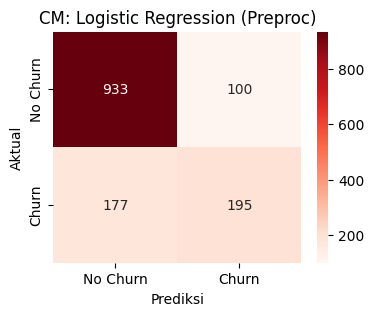


Melatih Model: Random Forest (Preproc)...
Accuracy: 0.7815
Precision: 0.6173
Recall: 0.4597
F1-Score: 0.5270
Confusion Matrix:
 [[927 106]
 [201 171]]


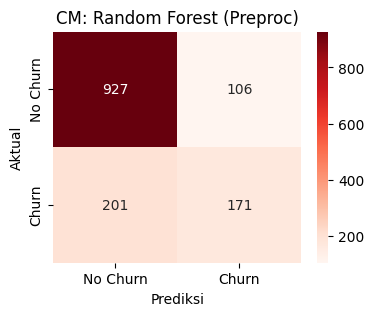


Melatih Model: Voting Classifier (Preproc)...
Accuracy: 0.7843
Precision: 0.6177
Recall: 0.4866
F1-Score: 0.5444
Confusion Matrix:
 [[921 112]
 [191 181]]


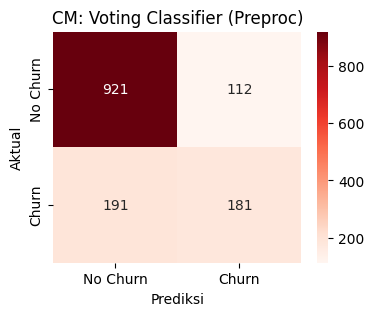


--- Ringkasan Performa Modeling dengan Preprocessing ---
                           Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression (Preproc)  0.802847   0.661017  0.524194  0.584708
2    Voting Classifier (Preproc)  0.784342   0.617747  0.486559  0.544361
1        Random Forest (Preproc)  0.781495   0.617329  0.459677  0.526965


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Model Imports (sudah dilakukan sebelumnya, tapi diulang untuk kelengkapan)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib

# Membuat salinan data untuk skenario Preprocessing
df_preproc = df.copy()

print("\n\n#####################################################")
print("## 1. Penanganan Data Awal (Preprocessing)")
print("#####################################################")

# 1.1 Hapus Kolom yang Tidak Diperlukan (customerID)
df_preproc.drop('customerID', axis=1, inplace=True)

# 1.2 Penanganan Duplikasi (Cek apakah ada duplikasi)
print(f"Jumlah baris duplikat sebelum dihapus: {df_preproc.duplicated().sum()}")
if df_preproc.duplicated().sum() > 0:
    df_preproc.drop_duplicates(inplace=True)
    print("Baris duplikat telah dihapus.")

# 1.3 Encoding Variabel Target (Churn: Yes=1, No=0)
df_preproc['Churn'] = df_preproc['Churn'].map({'Yes': 1, 'No': 0})

# 1.4 Pemisahan Fitur (X) dan Target (y)
X_preproc = df_preproc.drop('Churn', axis=1)
y_preproc = df_preproc['Churn']

# 1.5 Pemisahan Fitur berdasarkan Tipe Data (untuk Pipeline)
numerical_features = X_preproc.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Kita akan menyertakan semua 'object' kecuali yang hanya memiliki dua nilai unik 
# (karena sudah dikategorikan di pipeline)
categorical_features = X_preproc.select_dtypes(include=['object']).columns.tolist() 

print(f"Fitur Numerik: {numerical_features}")
print(f"Fitur Kategorikal: {categorical_features}")

# --- 2. Pembuatan Preprocessing Pipeline ---

# Pipeline untuk Fitur Numerik
# 1. Imputasi (mengisi NaN dengan median)
# 2. Scaling (StandardScaler)
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Penanganan missing value
    ('scaler', StandardScaler())                    # Scaling fitur
])

# Pipeline untuk Fitur Kategorikal (Menggunakan One-Hot Encoding)
categorical_pipeline = Pipeline([
    # Imputasi dengan nilai paling sering (mode) jika ada NaN di kategorikal
    ('imputer_cat', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # Encoding OHE
])

# Column Transformer: Menggabungkan kedua pipeline
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

print("\nPipeline Preprocessing telah dibuat.")
# Melatih preprocessor pada data latih (akan dilakukan setelah split)


# --- 3. Train-Test Split (dengan Stratify) ---

# Tugas 3.3: Lakukan train-test split dengan proporsi yang sama (80:20)
X_train_preproc, X_test_preproc, y_train_preproc, y_test_preproc = train_test_split(
    X_preproc, y_preproc, test_size=0.2, random_state=42, stratify=y_preproc
)

print(f"Ukuran Data Latih (X): {X_train_preproc.shape}")
print(f"Ukuran Data Uji (X): {X_test_preproc.shape}")

# Terapkan Preprocessor ke data latih dan uji
X_train_processed = preprocessor.fit_transform(X_train_preproc)
X_test_processed = preprocessor.transform(X_test_preproc)

# --- 4. Pelatihan Model (Preprocessed Data) ---

print("\n\n#####################################################")
print("## 4. Pelatihan dan Evaluasi (Modeling dengan Preprocessing)")
print("#####################################################")

# Inisialisasi Model (Menggunakan hyperparameter default seperti Direct Modeling)

# Model Konvensional
lr_preproc = LogisticRegression(max_iter=1000, random_state=42)

# Model Ensemble Bagging
rf_preproc = RandomForestClassifier(random_state=42)

# Model Ensemble Voting
knn_preproc = KNeighborsClassifier()
voting_preproc = VotingClassifier(
    estimators=[
        ('lr', lr_preproc), 
        ('rf', rf_preproc), 
        ('knn', knn_preproc)
    ], 
    voting='hard'
)

models_preproc = {
    'Logistic Regression (Preproc)': lr_preproc,
    'Random Forest (Preproc)': rf_preproc,
    'Voting Classifier (Preproc)': voting_preproc
}

results_preproc = []

for name, model in models_preproc.items():
    # 4.1 Melatih model menggunakan data yang sudah diproses
    print(f"\nMelatih Model: {name}...")
    model.fit(X_train_processed, y_train_preproc)
    
    # 4.2 Prediksi
    y_pred = model.predict(X_test_processed)
    
    # 4.3 Evaluasi performa model
    acc = accuracy_score(y_test_preproc, y_pred)
    prec = precision_score(y_test_preproc, y_pred)
    rec = recall_score(y_test_preproc, y_pred)
    f1 = f1_score(y_test_preproc, y_pred)
    cm = confusion_matrix(y_test_preproc, y_pred)
    
    # Simpan hasil
    results_preproc.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

    # Tampilkan hasil
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Confusion Matrix:\n", cm)
    
    # Visualisasi Confusion Matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
                xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title(f'CM: {name}')
    plt.ylabel('Aktual')
    plt.xlabel('Prediksi')
    plt.show() # [Image of a confusion matrix heatmap for a classification model after preprocessing]

# Tampilkan ringkasan hasil
summary_df_preproc = pd.DataFrame(results_preproc)
print("\n--- Ringkasan Performa Modeling dengan Preprocessing ---")
print(summary_df_preproc.sort_values(by='F1-Score', ascending=False))



#####################################################
## 1. Persiapan Data dan Cross-Validation
#####################################################

--- Tuning Logistic Regression ---
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters LR: {'C': 1, 'penalty': 'l2'}
Best F1 Score LR (CV): 0.5967

--- Tuning Random Forest Classifier ---
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters RF: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best F1 Score RF (CV): 0.5872

--- Tuning Voting Classifier ---
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters Voting: {'weights': [2, 1, 1]}
Best F1 Score Voting (CV): 0.5970


#####################################################
## 5. Evaluasi Final Model Hasil Tuning
#####################################################

Model: LR (Tuned)
Accuracy: 0.8021
Precision: 0.6599
Recall: 0.5215
F1-Score: 0.5826
Confusion Matrix:
 [[933 1

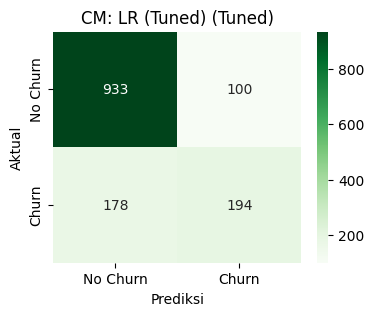


Model: RF (Tuned)
Accuracy: 0.7979
Precision: 0.6549
Recall: 0.5000
F1-Score: 0.5671
Confusion Matrix:
 [[935  98]
 [186 186]]


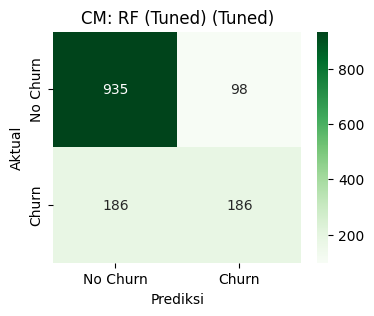


Model: Voting (Tuned)
Accuracy: 0.7929
Precision: 0.6328
Recall: 0.5188
F1-Score: 0.5702
Confusion Matrix:
 [[921 112]
 [179 193]]


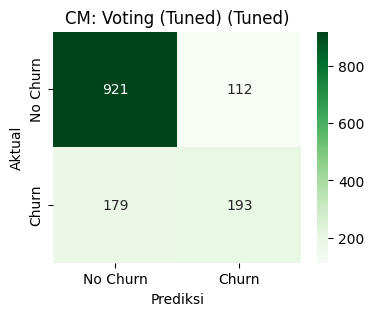


--- Ringkasan Performa Model Hasil Hyperparameter Tuning ---
            Model  Accuracy  Precision    Recall  F1-Score
0      LR (Tuned)  0.802135   0.659864  0.521505  0.582583
2  Voting (Tuned)  0.792883   0.632787  0.518817  0.570162
1      RF (Tuned)  0.797865   0.654930  0.500000  0.567073


In [4]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib

print("\n\n#####################################################")
print("## 1. Persiapan Data dan Cross-Validation")
print("#####################################################")

# Kita menggunakan data yang sudah diproses dari Tahap 2.2
# X_train_processed, X_test_processed, y_train_preproc, y_test_preproc

# Gunakan Stratified K-Fold untuk menjaga proporsi kelas (Churn/Non-Churn) 
# di setiap fold saat cross-validation.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- 2. Hyperparameter Tuning untuk Logistic Regression ---

print("\n--- Tuning Logistic Regression ---")
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l2']              # L2 regularization is standard for LR
}

# Inisialisasi GridSearchCV
grid_lr = GridSearchCV(
    estimator=LogisticRegression(solver='liblinear', random_state=42),
    param_grid=lr_param_grid,
    scoring='f1',                    # Fokus pada F1-score
    cv=skf,
    verbose=1,
    n_jobs=-1
)

# Tugas 2.2: Lakukan tuning
grid_lr.fit(X_train_processed, y_train_preproc)

# Tugas 2.3: Dapatkan best estimator
best_lr = grid_lr.best_estimator_

print(f"Best Parameters LR: {grid_lr.best_params_}")
print(f"Best F1 Score LR (CV): {grid_lr.best_score_:.4f}")


# --- 3. Hyperparameter Tuning untuk Random Forest ---

print("\n--- Tuning Random Forest Classifier ---")
rf_param_grid = {
    'n_estimators': [100, 200, 300],         # Number of trees
    'max_depth': [10, 20, None],             # Max depth of the tree
    'min_samples_split': [2, 5],             # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]               # Minimum number of samples required to be at a leaf node
}

# Inisialisasi GridSearchCV
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    scoring='f1',
    cv=skf,
    verbose=1,
    n_jobs=-1
)

# Lakukan tuning
grid_rf.fit(X_train_processed, y_train_preproc)
best_rf = grid_rf.best_estimator_

print(f"Best Parameters RF: {grid_rf.best_params_}")
print(f"Best F1 Score RF (CV): {grid_rf.best_score_:.4f}")


# --- 4. Hyperparameter Tuning untuk Voting Classifier ---

print("\n--- Tuning Voting Classifier ---")

# Kita akan menggunakan Best Estimator dari LR dan RF, dan melakukan tuning pada bobot (weights)
# serta parameter KNN (sebagai model ketiga)

# Menggunakan model dasar yang sudah dioptimalkan dari skenario Direct Modeling 
# atau mengambil model default terbaik dari Preprocessing
# Untuk efisiensi, kita akan menggunakan LR dan RF terbaik dari tuning di atas
best_knn = KNeighborsClassifier(n_neighbors=5) # Default KNN yang cukup baik

voting_clf = VotingClassifier(
    estimators=[
        ('lr', best_lr), 
        ('rf', best_rf), 
        ('knn', best_knn)
    ],
    voting='soft' # Menggunakan voting 'soft' untuk memanfaatkan probabilitas
)

voting_param_grid = {
    'weights': [[1, 1, 1], [1, 2, 1], [2, 1, 1]] # Menentukan bobot untuk LR, RF, KNN
}

grid_voting = GridSearchCV(
    estimator=voting_clf,
    param_grid=voting_param_grid,
    scoring='f1',
    cv=skf,
    verbose=1,
    n_jobs=-1
)

# Lakukan tuning
grid_voting.fit(X_train_processed, y_train_preproc)
best_voting = grid_voting.best_estimator_

print(f"Best Parameters Voting: {grid_voting.best_params_}")
print(f"Best F1 Score Voting (CV): {grid_voting.best_score_:.4f}")


# --- 5. Evaluasi Final Model Hasil Tuning ---

print("\n\n#####################################################")
print("## 5. Evaluasi Final Model Hasil Tuning")
print("#####################################################")

# Kumpulkan semua best estimator
tuned_models = {
    'LR (Tuned)': best_lr,
    'RF (Tuned)': best_rf,
    'Voting (Tuned)': best_voting
}

results_tuned = []

for name, model in tuned_models.items():
    # Model sudah terlatih melalui GridSearchCV, kita hanya perlu memprediksi pada data uji
    y_pred = model.predict(X_test_processed)
    
    # Evaluasi performa model
    acc = accuracy_score(y_test_preproc, y_pred)
    prec = precision_score(y_test_preproc, y_pred)
    rec = recall_score(y_test_preproc, y_pred)
    f1 = f1_score(y_test_preproc, y_pred)
    cm = confusion_matrix(y_test_preproc, y_pred)
    
    # Simpan hasil
    results_tuned.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

    # Tampilkan hasil
    print(f"\nModel: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Confusion Matrix:\n", cm)
    
    # Visualisasi Confusion Matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
                xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title(f'CM: {name} (Tuned)')
    plt.ylabel('Aktual')
    plt.xlabel('Prediksi')
    plt.show() # 

# Tampilkan ringkasan hasil
summary_df_tuned = pd.DataFrame(results_tuned)
print("\n--- Ringkasan Performa Model Hasil Hyperparameter Tuning ---")
print(summary_df_tuned.sort_values(by='F1-Score', ascending=False))

In [ ]:
import joblib

# Model terbaik adalah Logistic Regression Tuned (best_lr)
final_model = best_lr

# Simpan model terbaik dalam format joblib di folder 'models'
joblib.dump(final_model, 'models/best_churn_model.joblib')
print("\nModel terbaik (Logistic Regression Tuned) berhasil disimpan di 'models/best_churn_model.joblib'.")

# Simpan juga Preprocessor (yang berisi encoding dan scaling)
joblib.dump(preprocessor, 'models/preprocessor.joblib')
print("Preprocessor (ColumnTransformer) berhasil disimpan di 'models/preprocessor.joblib'.")


Model terbaik (Logistic Regression Tuned) berhasil disimpan di 'models/best_churn_model.joblib'.
Preprocessor (ColumnTransformer) berhasil disimpan di 'models/preprocessor.joblib'.
